In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'H:\data analysis\Kaggle\Churn Dataset.csv')

In [3]:
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [5]:
483/2850

0.1694736842105263

#### highly imbalanced data

### performing EDA

In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### all values are numerical but they will need to be normalised

In [8]:
df.shape

(3333, 11)

In [9]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [10]:
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


In [11]:
df.cov()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,0.123951,0.231902,-0.027069,-0.016090,-0.039069,0.096681,3.934012,0.130427,0.418190,0.082858,0.067073
AccountWeeks,0.231902,1585.800121,-0.291437,0.051995,0.729328,-0.198853,13.482587,30.744868,8.229257,-0.681543,1.057726
ContractRenewal,-0.027069,-0.291437,0.087544,-0.000795,-0.007239,0.009545,-0.796051,-0.022295,-0.229842,-0.014334,-0.037891
DataPlan,-0.016090,0.051995,-0.000795,0.200165,0.538632,-0.010490,-0.041038,-0.099539,5.419791,0.024420,-0.001646
DataUsage,-0.039069,0.729328,-0.007239,0.538632,1.619684,-0.036367,0.220153,-0.203362,16.340522,0.063372,0.578249
CustServCalls,0.096681,-0.198853,0.009545,-0.010490,-0.036367,1.730517,-0.961790,-0.500080,-0.605396,-0.043245,-0.035403
DayMins,3.934012,13.482587,-0.796051,-0.041038,0.220153,-0.961790,2966.696487,7.378949,508.151281,0.972073,-1.544149
DayCalls,0.130427,30.744868,-0.022295,-0.099539,-0.203362,-0.500080,7.378949,402.768141,-2.625118,-1.091507,1.208268
MonthlyCharge,0.418190,8.229257,-0.229842,5.419791,16.340522,-0.605396,508.151281,-2.625118,269.814517,11.736030,5.385324
OverageFee,0.082858,-0.681543,-0.014334,0.024420,0.063372,-0.043245,0.972073,-1.091507,11.736030,6.429835,-0.078038


<AxesSubplot: >

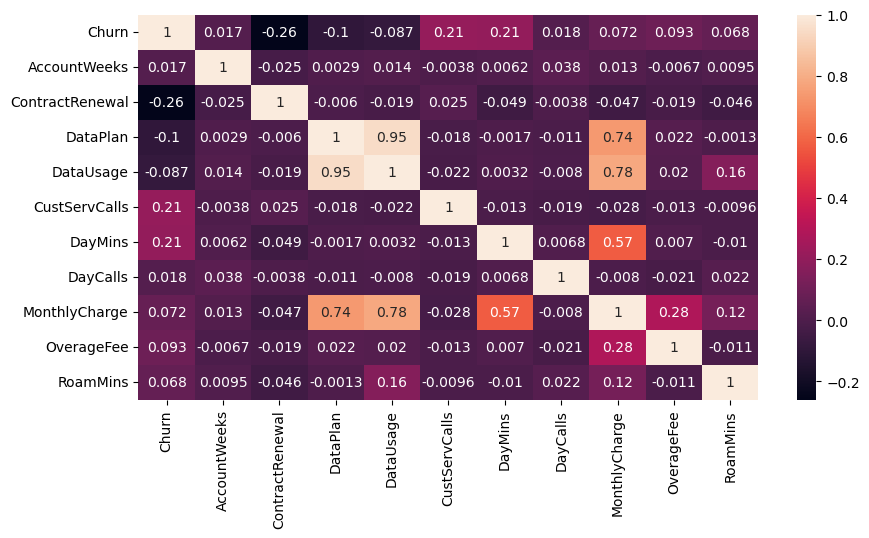

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

### No missing values , the dataset seems to be clean

<AxesSubplot: xlabel='Churn', ylabel='count'>

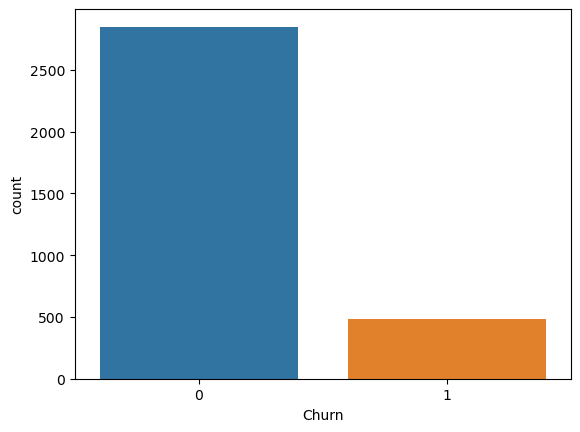

In [13]:
sns.countplot(x=df.Churn,data=df)

<AxesSubplot: xlabel='Churn', ylabel='Density'>

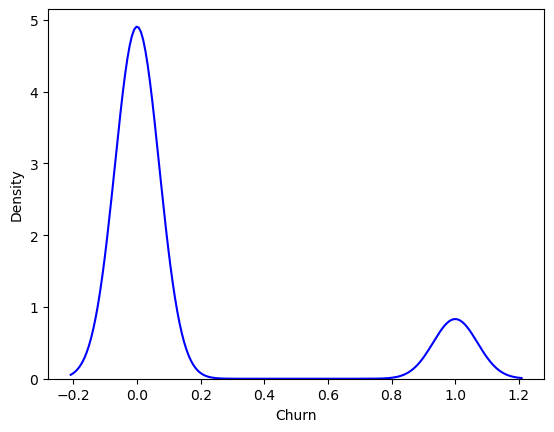

In [14]:
sns.kdeplot(df.Churn, color="blue")

<AxesSubplot: xlabel='ContractRenewal', ylabel='count'>

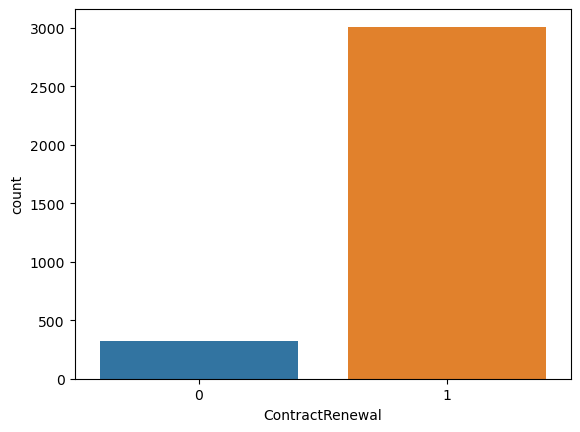

In [15]:
sns.countplot(x=df.ContractRenewal,data=df)

<AxesSubplot: xlabel='ContractRenewal', ylabel='Density'>

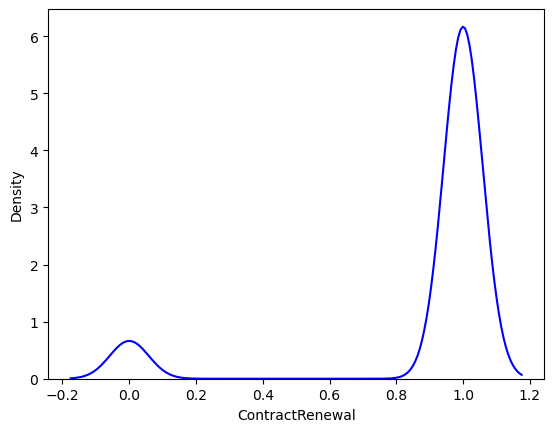

In [16]:
sns.kdeplot(df.ContractRenewal, color="blue")

<AxesSubplot: xlabel='DataPlan', ylabel='count'>

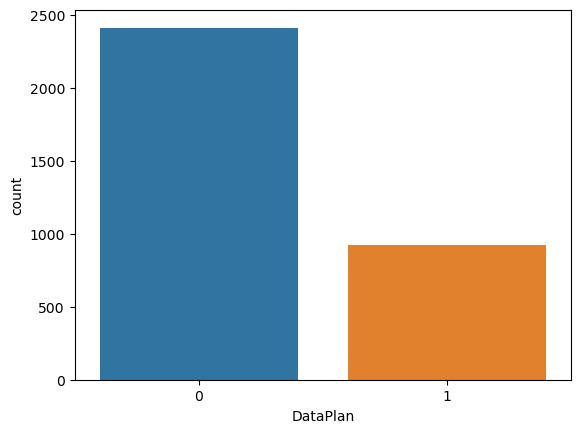

In [17]:
sns.countplot(x=df.DataPlan,data=df)

<AxesSubplot: xlabel='DataPlan', ylabel='Density'>

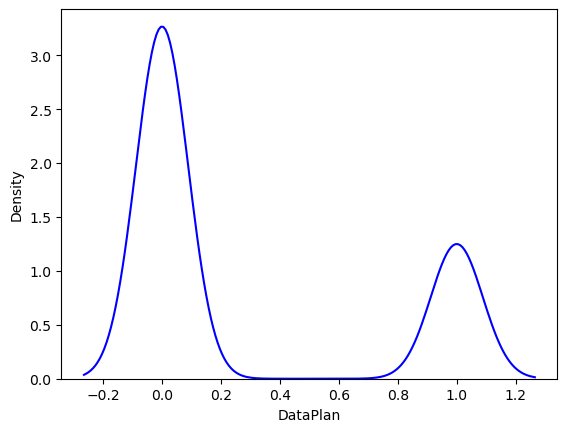

In [18]:
sns.kdeplot(df.DataPlan, color="blue")

<AxesSubplot: xlabel='CustServCalls', ylabel='count'>

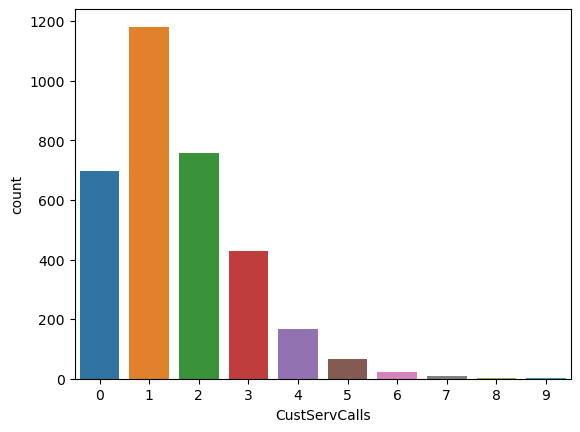

In [19]:
sns.countplot(x=df.CustServCalls,data=df)

<AxesSubplot: xlabel='CustServCalls', ylabel='Density'>

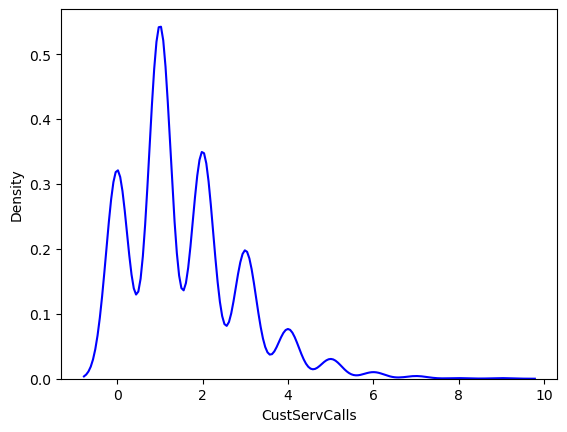

In [20]:
sns.kdeplot(df.CustServCalls, color="blue")

<AxesSubplot: xlabel='DataUsage', ylabel='count'>

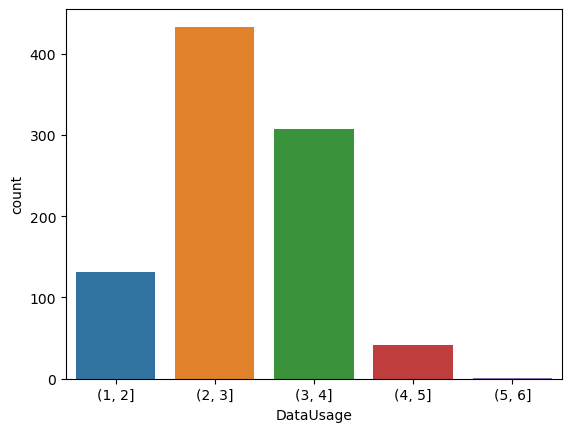

In [21]:
datausage = pd.cut(df.DataUsage,bins=[1,2,3,4,5,6])
sns.countplot(x=datausage,data=df)

<AxesSubplot: xlabel='DataUsage', ylabel='Density'>

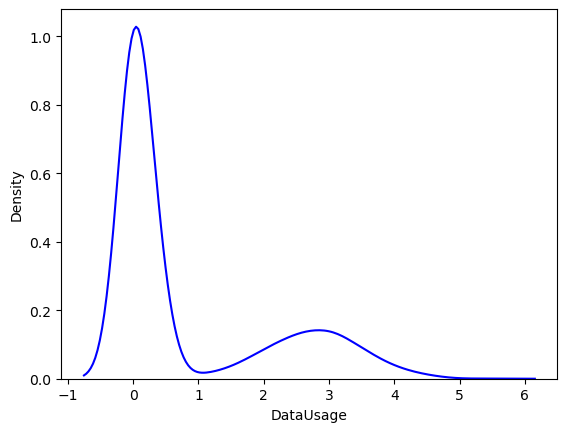

In [22]:
sns.kdeplot(df.DataUsage, color="blue")

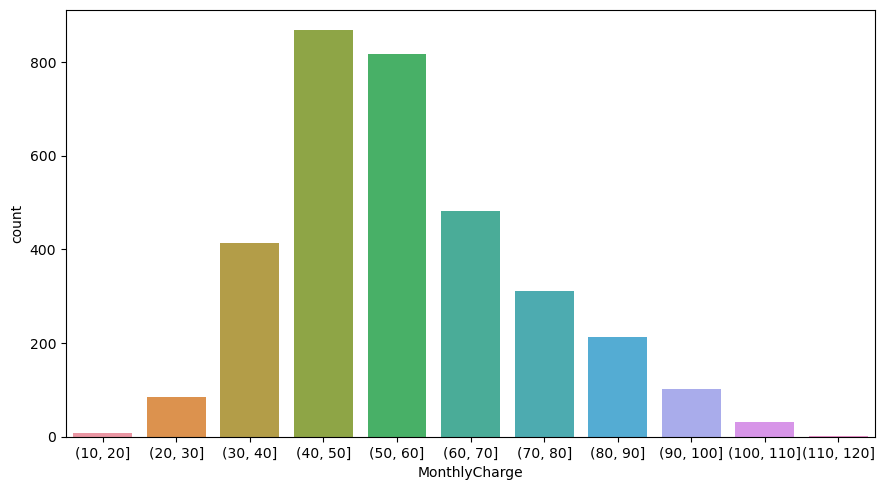

In [23]:
plt.figure(figsize=(9,5))
monthlycharge = pd.cut(df.MonthlyCharge,bins=[10,20,30,40,50,60,70,80,90,100,110,120])
sns.countplot(x=monthlycharge,data=df)
plt.tight_layout()

<AxesSubplot: xlabel='MonthlyCharge', ylabel='Density'>

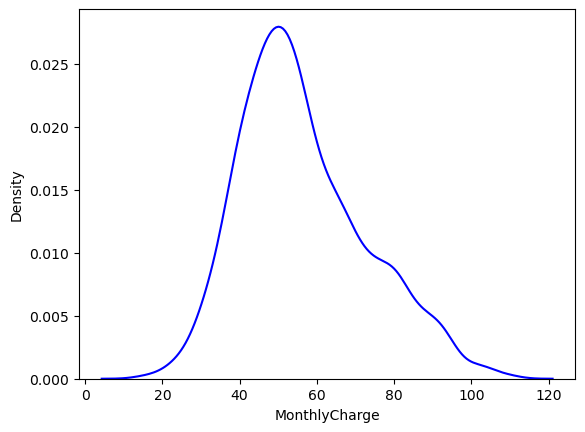

In [24]:
sns.kdeplot(df.MonthlyCharge, color="blue")

<AxesSubplot: xlabel='DayMins', ylabel='count'>

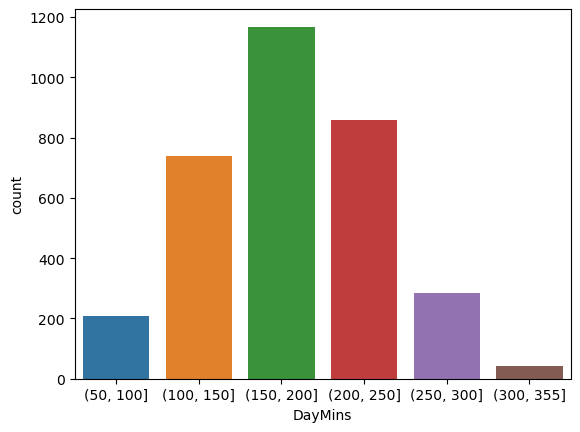

In [25]:
daymins = pd.cut(df.DayMins,bins=[50,100,150,200,250,300,355])
sns.countplot(x=daymins,data=df)

<AxesSubplot: xlabel='DayMins', ylabel='Density'>

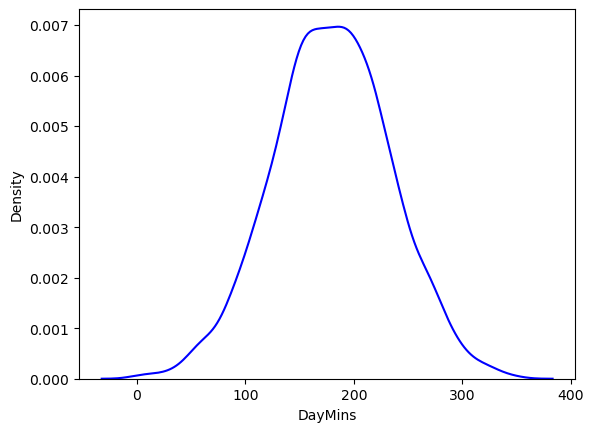

In [26]:
sns.kdeplot(df.DayMins, color="blue")

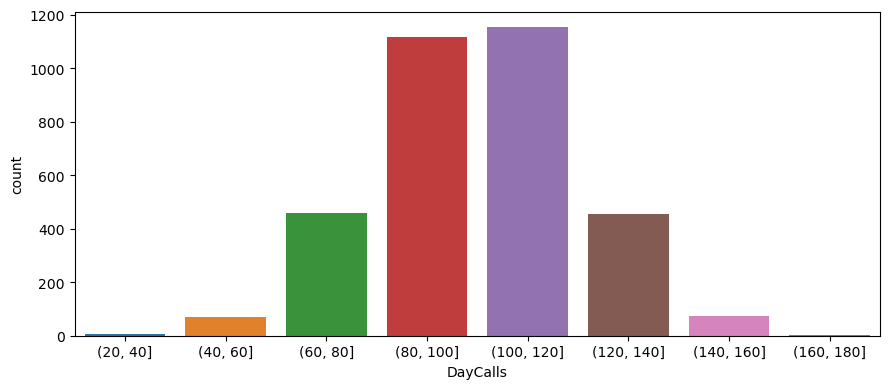

In [27]:
plt.figure(figsize=(9,4))
daycalls = pd.cut(df.DayCalls,bins=[20,40,60,80,100,120,140,160,180])
sns.countplot(x=daycalls,data=df)
plt.tight_layout()

<AxesSubplot: xlabel='DayCalls', ylabel='Density'>

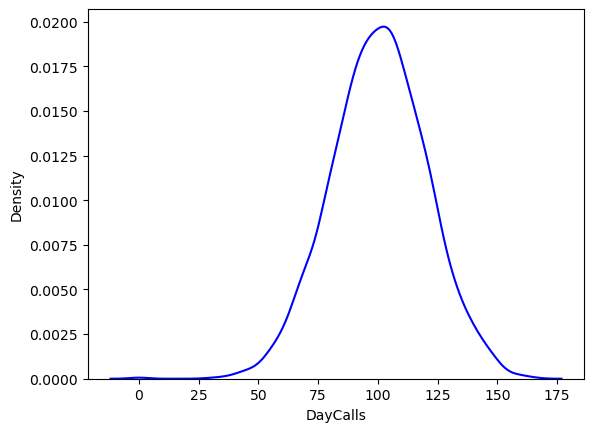

In [28]:
sns.kdeplot(df.DayCalls, color="blue")

<AxesSubplot: xlabel='AccountWeeks', ylabel='count'>

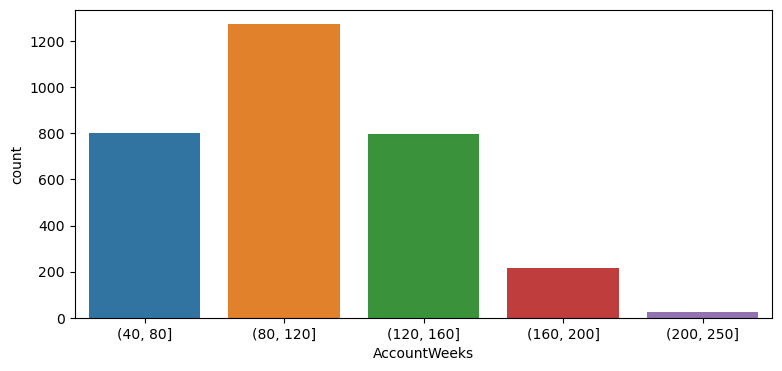

In [29]:
plt.figure(figsize=(9,4))
accountweeks = pd.cut(df.AccountWeeks,bins=[40,80,120,160,200,250])
sns.countplot(x=accountweeks,data=df)

<AxesSubplot: xlabel='AccountWeeks', ylabel='Density'>

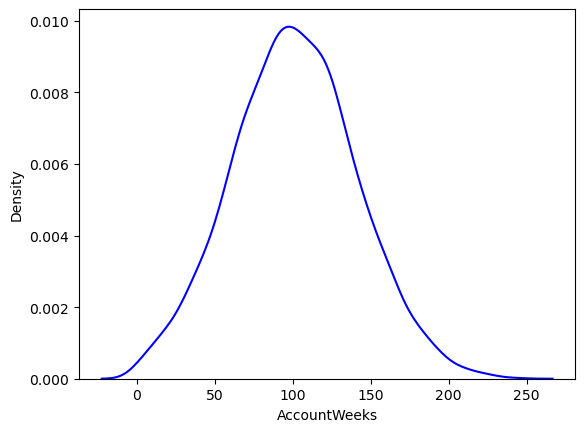

In [30]:
sns.kdeplot(df.AccountWeeks, color="blue")

<AxesSubplot: xlabel='OverageFee', ylabel='count'>

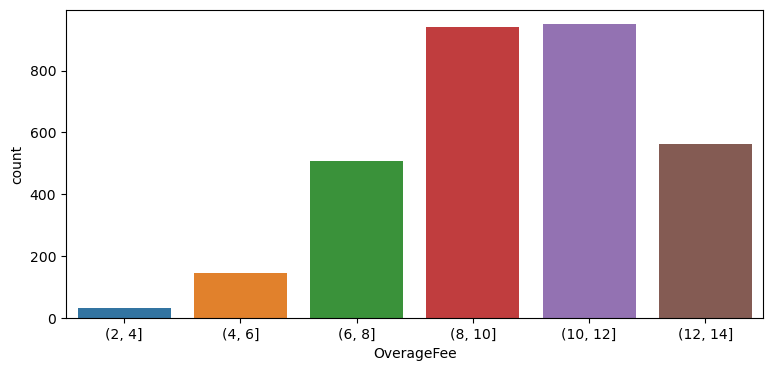

In [31]:
plt.figure(figsize=(9,4))
overagefee = pd.cut(df.OverageFee,bins=[2,4,6,8,10,12,14])
sns.countplot(x=overagefee,data=df)

<AxesSubplot: xlabel='OverageFee', ylabel='Density'>

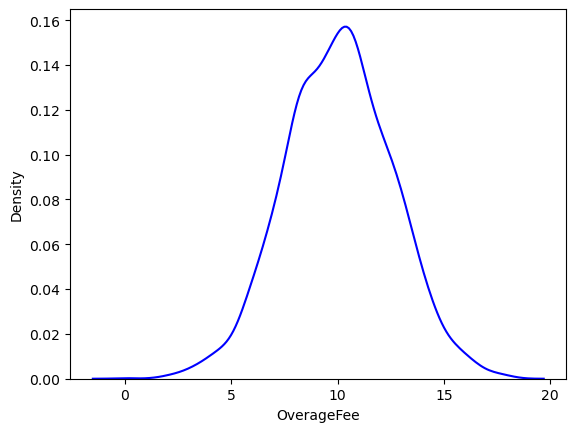

In [32]:
sns.kdeplot(df.OverageFee, color="blue")

### Except a few columns all columns have a normal distribution

## Bivariate Analysis

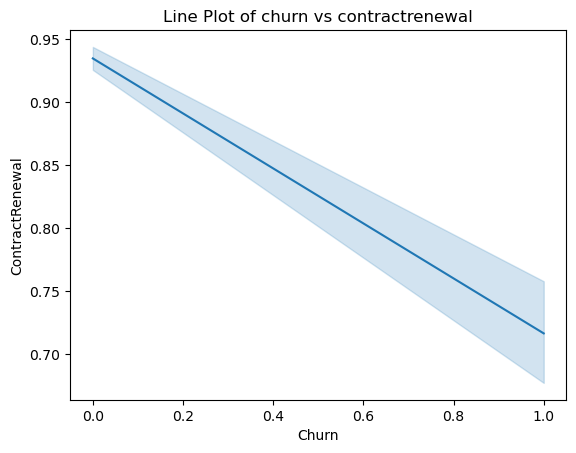

In [33]:
sns.lineplot(x=df.Churn, y=df.ContractRenewal, data=df)
plt.title('Line Plot of churn vs contractrenewal')
plt.show()


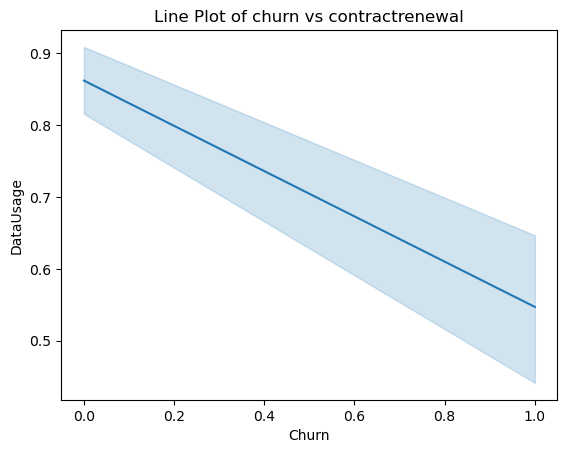

In [34]:
sns.lineplot(x=df.Churn, y=df.DataUsage, data=df)
plt.title('Line Plot of churn vs contractrenewal')
plt.show()


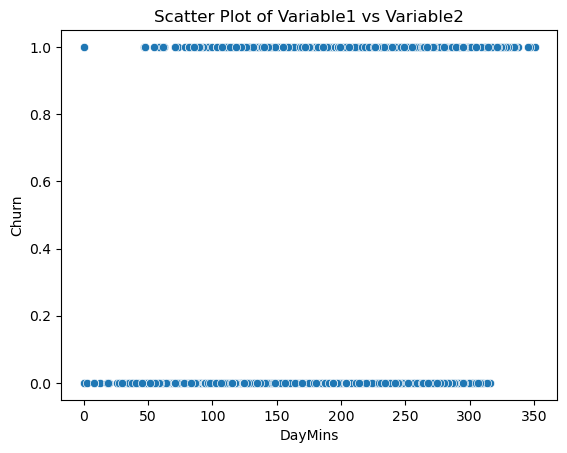

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(y=df.Churn, x=df.DayMins, data=df)
plt.title('Scatter Plot of Variable1 vs Variable2')
plt.show()


''' conda install imblearn''''

In [36]:
y = df.Churn
X = df.drop('Churn',axis=1)

In [37]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

In [38]:
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

(2333, 10) (2333,) (1000, 10) (1000,)


In [39]:
ytrain.value_counts()

0    1995
1     338
Name: Churn, dtype: int64

In [40]:
ytest.value_counts()

0    855
1    145
Name: Churn, dtype: int64

### using smote to balance the data before training

In [41]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
for i in df.columns:
    df[i] = scl.fit_transform(df[i].values.reshape(-1,1))

In [42]:
df.describe().round(2)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-2.51,-3.05,-0.62,-0.64,-1.19,-3.30,-5.01,-2.58,-3.96,-3.67
25%,-0.41,-0.68,0.33,-0.62,-0.64,-0.43,-0.66,-0.67,-0.69,-0.68,-0.62
50%,-0.41,-0.00,0.33,-0.62,-0.64,-0.43,-0.01,0.03,-0.17,0.01,0.02
75%,-0.41,0.65,0.33,1.62,0.76,0.33,0.67,0.68,0.60,0.68,0.67
max,2.43,3.56,0.33,1.62,3.60,5.65,3.14,3.22,3.35,3.21,3.50


In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)

In [44]:
Xtrainupdt,ytrainupdt = sm.fit_resample(Xtrain,ytrain)

In [59]:
print(Xtrainupdt.shape,ytrainupdt.shape)

(3990, 10) (3990,)


In [46]:
ytrainupdt.value_counts()

0    1995
1    1995
Name: Churn, dtype: int64

In [47]:
from sklearn.linear_model  import LogisticRegression

lr = LogisticRegression()

model = lr.fit(Xtrainupdt,ytrainupdt)
pred = model.predict(Xtest)

#also checking without SMOTE
lr1 = LogisticRegression()
mdl = lr1.fit(Xtrain,ytrain)
prd = mdl.predict(Xtest)

H:\data analysis\Anacoinstaller\INSTALLER\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
H:\data analysis\Anacoinstaller\INSTALLER\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))
print(classification_report(ytest,prd))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       855
           1       0.33      0.67      0.44       145

    accuracy                           0.76      1000
   macro avg       0.63      0.72      0.64      1000
weighted avg       0.85      0.76      0.79      1000

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       855
           1       0.43      0.15      0.22       145

    accuracy                           0.85      1000
   macro avg       0.65      0.56      0.57      1000
weighted avg       0.81      0.85      0.82      1000



In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))
print(accuracy_score(ytest,prd))

0.757
0.848


### As we can see that the overall accuracy may have decreased from 84.8% to 75.7% , but the recall value has 
### increased from 15% to overwhelming 67% thus becoming good at identifying the churning customers

### Although the increase in learning is significant but the efficiency is still on lower side about 67%, In next steps we will try building bagging, boosting and ensemble models to bump up these numbers

### Decision trees have been known to have better performance than these models being applied independently.

### Followed by Random Forest and other models

In [54]:
!pip install lazypredict

  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 2.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.3 MB 1.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.3 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.2 MB/s eta 0:00:01
   


PackagesNotFoundError: The following packages are not available from current channels:

  - lazypredict

Current channels:

  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... failed


!conda install lazypredict

In [56]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrainupdt, Xtest, ytrainupdt, ytest)
print(models)

H:\data analysis\Anacoinstaller\INSTALLER\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 28/29 [00:19<00:01,  1.15s/it]

[LightGBM] [Info] Number of positive: 1995, number of negative: 1995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1598
[LightGBM] [Info] Number of data points in the train set: 3990, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:24<00:00,  1.18it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NuSVC                              0.85               0.83     0.83      0.87   
RandomForestClassifier             0.89               0.82     0.82      0.90   
LGBMClassifier                     0.88               0.81     0.81      0.89   
ExtraTreesClassifier               0.88               0.81     0.81      0.89   
QuadraticDiscriminantAnalysis      0.83               0.81     0.81      0.85   
SVC                                0.87               0.81     0.81      0.88   
XGBClassifier                      0.89               0.81     0.81      0.89   
AdaBoostClassifier                 0.86               0.80     0.80      0.87   
BaggingClassifier                  0.88               0.80     0.80      0.89   
DecisionTreeClassifier             0.83               0.78     0.78      0.85   
KNeighborsClassifier        

### From above we can see that Random Forest Classifier performs the best overall for this dataset. So, we will RandomForest as our Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=12, random_state=0)


RFmodel = clf.fit(Xtrainupdt, ytrainupdt)
RFpred = RFmodel.predict(Xtest)

In [74]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ytrainupdt, RFmodel.predict(Xtrainupdt)))

print(accuracy_score(ytest, RFpred))


0.9746867167919799
0.888


In [77]:
from sklearn.metrics import classification_report
print(classification_report(ytest,RFpred))
print(classification_report(ytrainupdt, RFmodel.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       855
           1       0.59      0.74      0.66       145

    accuracy                           0.89      1000
   macro avg       0.77      0.83      0.79      1000
weighted avg       0.90      0.89      0.89      1000

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1995
           1       0.99      0.96      0.97      1995

    accuracy                           0.97      3990
   macro avg       0.98      0.97      0.97      3990
weighted avg       0.98      0.97      0.97      3990



In [83]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

df1 = 

In [ ]:
transformer = ColumnTransformer(
    transformers = [
        (undersampling,StandardScaler(),[""])
    ], remainder='passthrough' )